In [19]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [20]:
# Data Aumentaion performs bad in small NN even worse than without data augmentaion!!!

In [21]:
#Data Loading
from keras.datasets import cifar10 
(train_images, train_labels), (test_images, test_labels)  = cifar10.load_data()
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

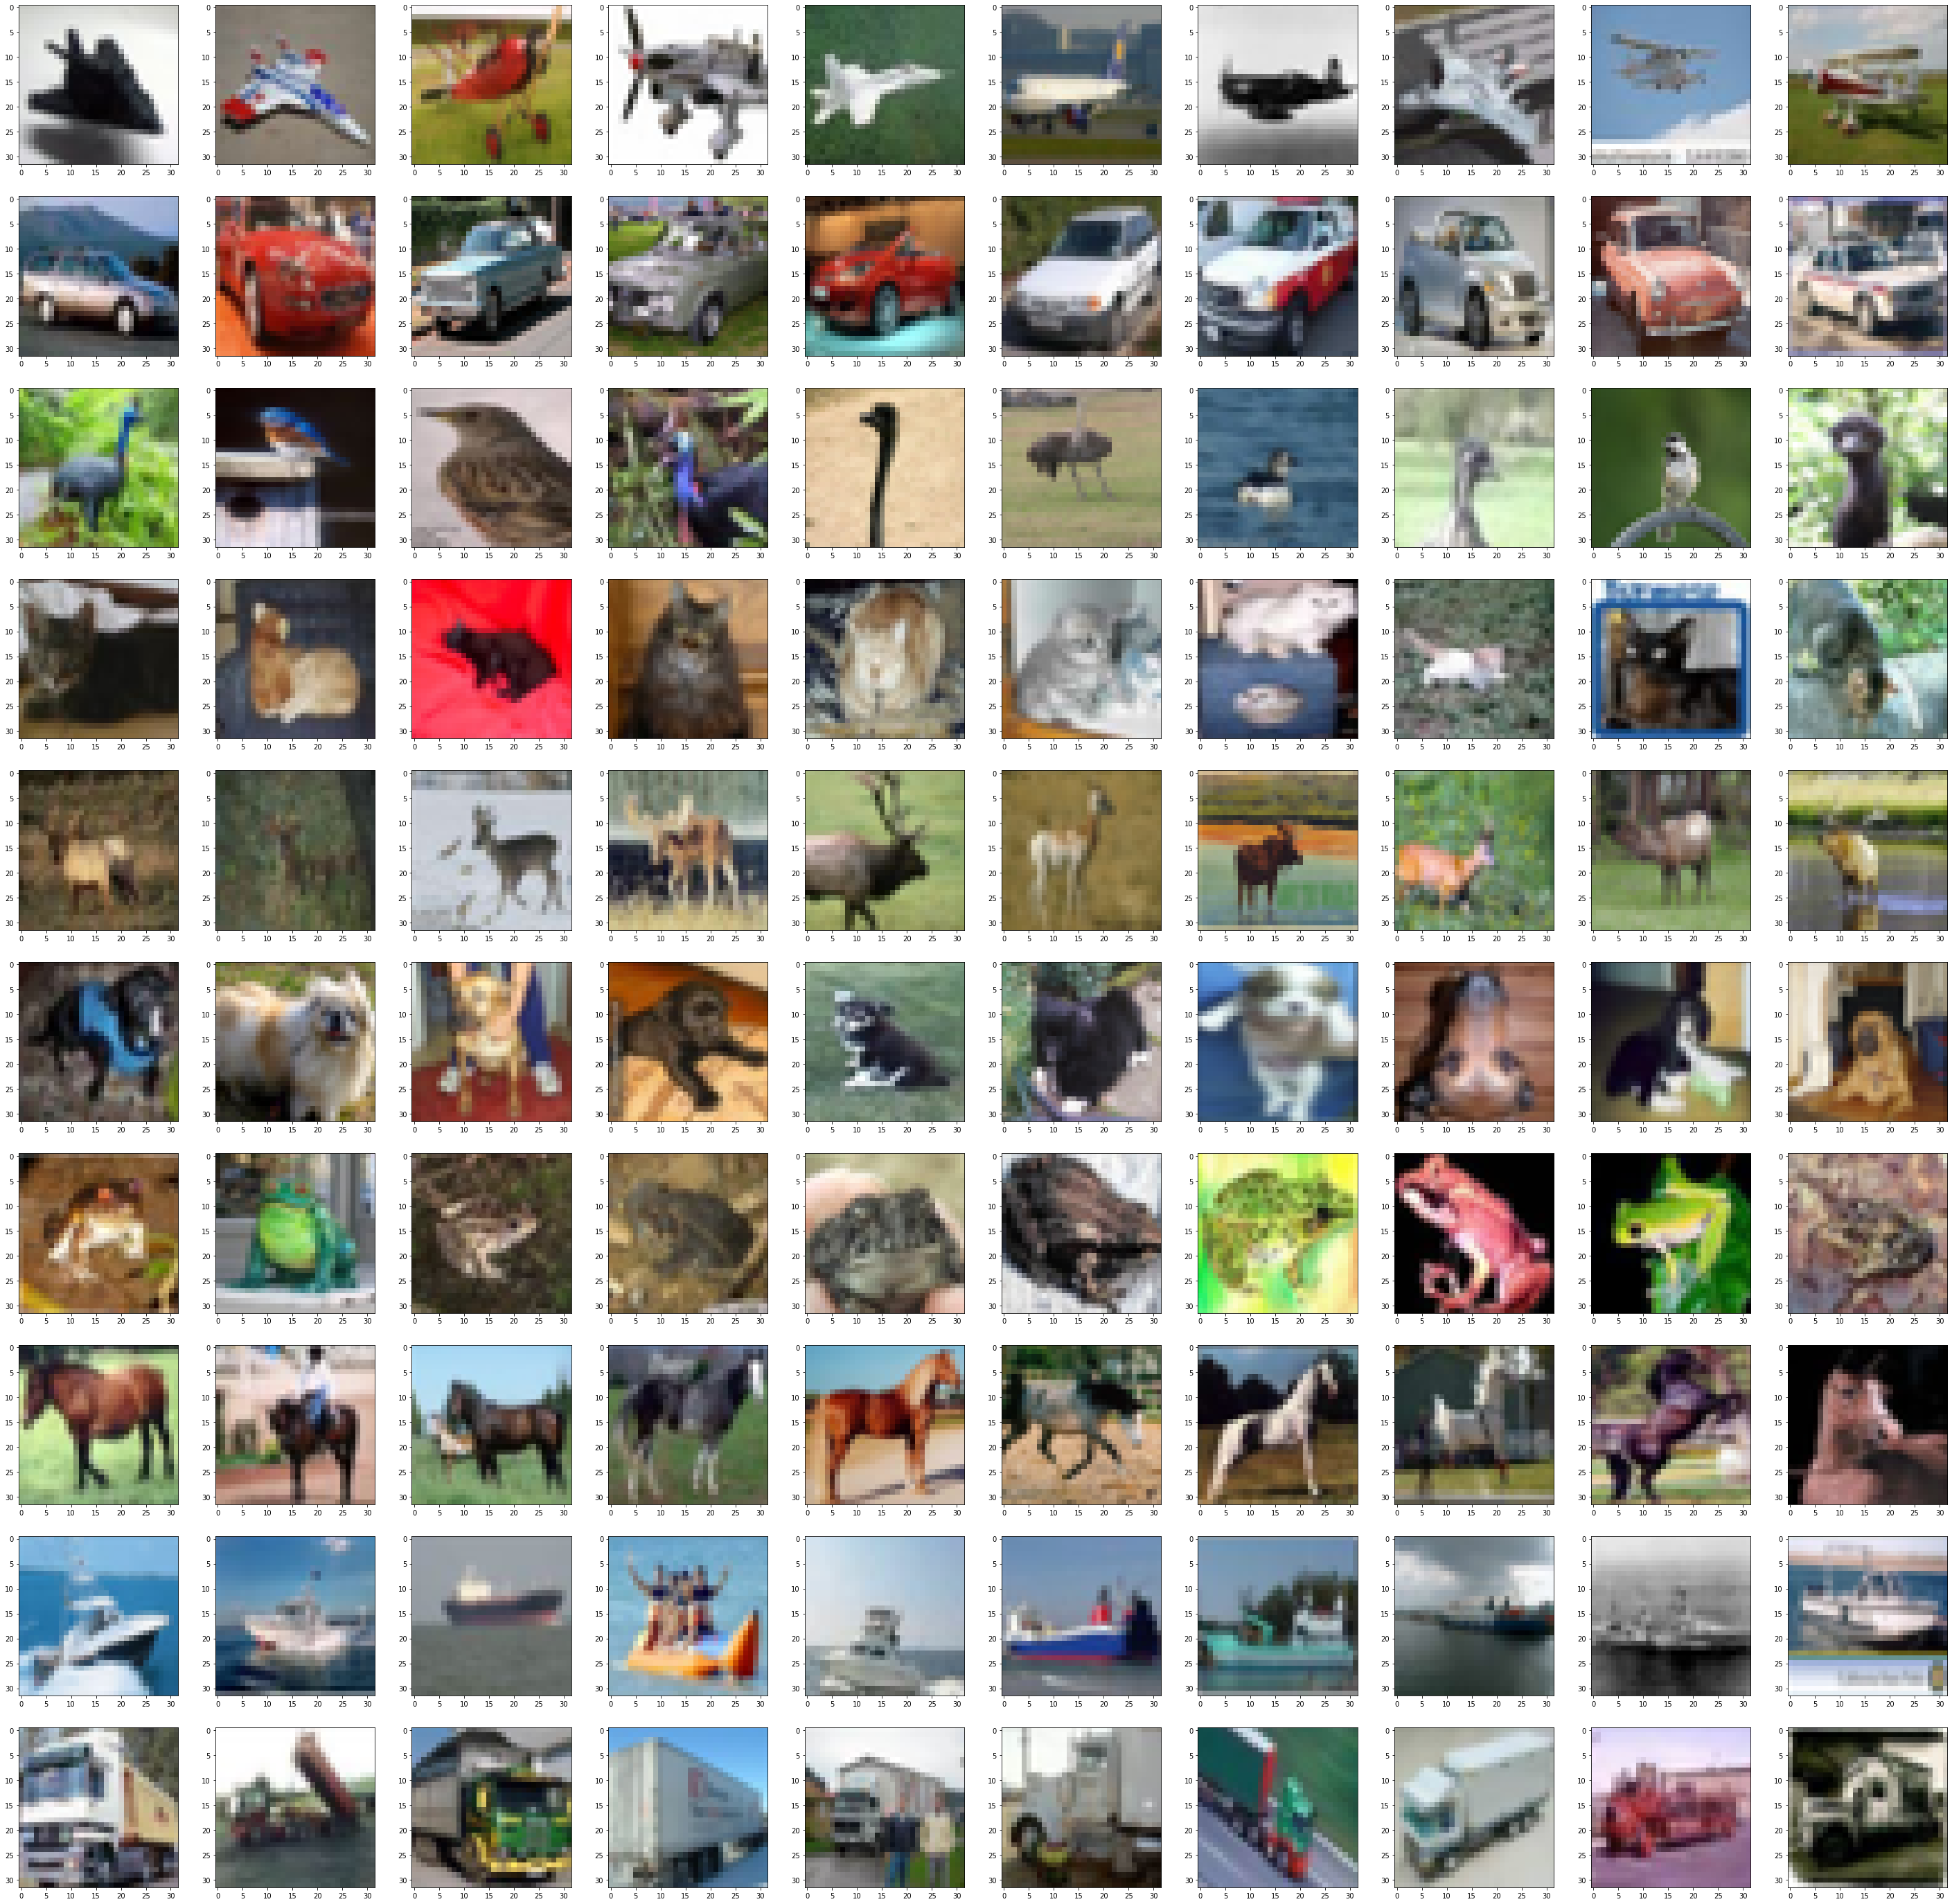

In [22]:
#Visualize 10 examples from each class, in a grid of 10x10 plots
import numpy as np
import matplotlib.pyplot as plt

classes=[]
for i in range(10):
    
    classes.append(np.where(train_labels == i)[0][:10])

fig = plt.figure(figsize=(50, 50))
index = 1
for i in classes:
    
    for j in i:
        fig.add_subplot(10, 10, index)
        img = train_images[j]
        plt.imshow(np.reshape(img, (32, 32, 3)))
        index+=1

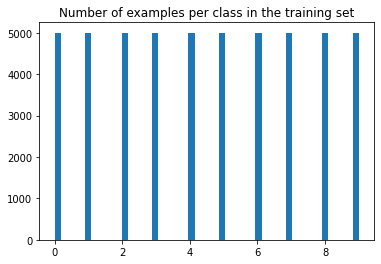

In [23]:
#Plot a histogram of number of examples per class in the training 
plt.hist(train_labels,bins=50)
plt.title('Number of examples per class in the training set');

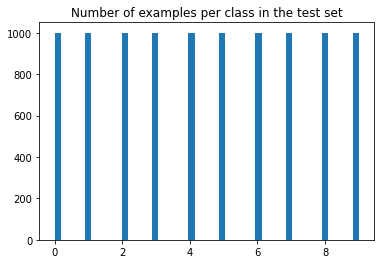

In [24]:
#Plot a histogram of number of examples per class in the test sets
plt.hist(test_labels,bins=50)
plt.title('Number of examples per class in the test set');

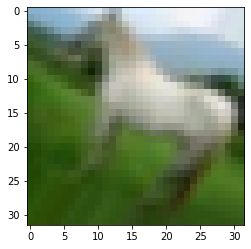

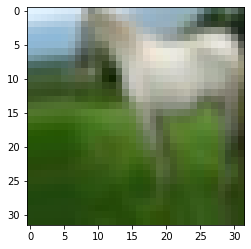

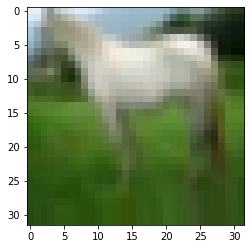

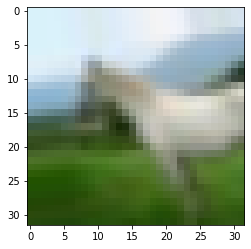

In [25]:
# Using Data Augmentaion
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

datagen = ImageDataGenerator(rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# We pick one image to "augment"
img = train_images[152]

# Resize the image
img = np.reshape(img, (32, 32, 3))

# Convert it to a Numpy array
x = image.img_to_array(img)

# Reshape it to (1, 32, 32, 3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    #conv_fm = model.predict(batch[0])
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    #save(X, y)
    i += 1
    if i % 4 == 0:#if i < 20000 == 0:
        break

plt.show()

In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                 input_shape=(32, 32, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,789,258
Trainable params: 14,789,258
Non-trainable params: 0
_________________________________________________________________


In [27]:
conv_base.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,789,258
Trainable params: 74,570
Non-trainable params: 14,714,688
_________________________________________________________________


In [28]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape, test_labels.shape

((50000, 10), (10000, 10))

In [29]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])


In [30]:
import tensorflow as tf

preprocess_input = tf.keras.applications.vgg16.preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,#rescale=1./255
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #rescale=1./255)


train_datagen.fit(train_images)
# fits the model on batches with real-time data augmentation:
history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=128),
         validation_data=test_datagen.flow(test_images, test_labels),
         steps_per_epoch=len(train_labels) / 128, epochs=10)

Epoch 1/10
390/390 [==============================] - 72s 183ms/step - loss: 1.9981 - accuracy: 0.3951 - val_loss: 1.3515 - val_accuracy: 0.5333
Epoch 2/10
390/390 [==============================] - 73s 188ms/step - loss: 1.4027 - accuracy: 0.5073 - val_loss: 1.2408 - val_accuracy: 0.5711
Epoch 3/10
390/390 [==============================] - 73s 188ms/step - loss: 1.3075 - accuracy: 0.5426 - val_loss: 1.1353 - val_accuracy: 0.6062
Epoch 4/10
390/390 [==============================] - 72s 186ms/step - loss: 1.2610 - accuracy: 0.5585 - val_loss: 1.1201 - val_accuracy: 0.6130
Epoch 5/10
390/390 [==============================] - 73s 186ms/step - loss: 1.2295 - accuracy: 0.5698 - val_loss: 1.1082 - val_accuracy: 0.6188
Epoch 6/10
390/390 [==============================] - 73s 186ms/step - loss: 1.2061 - accuracy: 0.5787 - val_loss: 1.0706 - val_accuracy: 0.6302
Epoch 7/10
390/390 [==============================] - 72s 185ms/step - loss: 1.1874 - accuracy: 0.5856 - val_loss: 1.0927 - val_ac

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

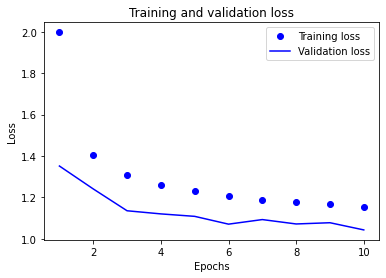

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

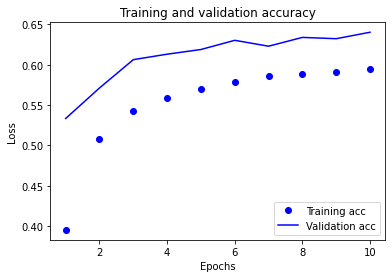

In [33]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Fine-tuning

In [34]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [36]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=128),
         validation_data=test_datagen.flow(test_images, test_labels),
         steps_per_epoch=len(train_labels) / 128, epochs=30)

Epoch 1/30
390/390 [==============================] - 695s 2s/step - loss: 1.0116 - accuracy: 0.6466 - val_loss: 0.8702 - val_accuracy: 0.6993
Epoch 2/30
390/390 [==============================] - 630s 2s/step - loss: 0.8984 - accuracy: 0.6869 - val_loss: 0.7826 - val_accuracy: 0.7315
Epoch 3/30
390/390 [==============================] - 589s 2s/step - loss: 0.8300 - accuracy: 0.7094 - val_loss: 0.7492 - val_accuracy: 0.7435
Epoch 4/30
390/390 [==============================] - 590s 2s/step - loss: 0.7835 - accuracy: 0.7261 - val_loss: 0.7129 - val_accuracy: 0.7592
Epoch 5/30
390/390 [==============================] - 593s 2s/step - loss: 0.7491 - accuracy: 0.7399 - val_loss: 0.6905 - val_accuracy: 0.7621
Epoch 6/30
390/390 [==============================] - 600s 2s/step - loss: 0.7291 - accuracy: 0.7465 - val_loss: 0.6425 - val_accuracy: 0.7812
Epoch 7/30
390/390 [==============================] - 608s 2s/step - loss: 0.6945 - accuracy: 0.7580 - val_loss: 0.6632 - val_accuracy: 0.7838

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

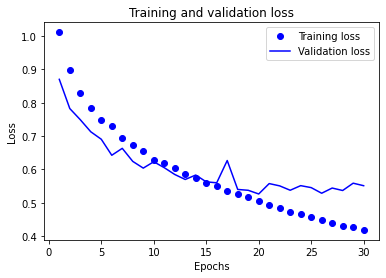

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

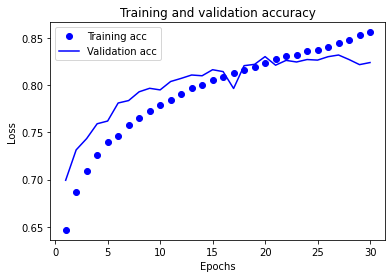

In [39]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
model.save('VGG16 AUG cifar.h5')

In [2]:
from keras.models import load_model

model = load_model('VGG16 AUG cifar.h5')

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 14,789,258
Trainable params: 14,529,098
Non-trainable params: 260,160
_________________________________________________________________


In [ ]:
def get_heatmap(model , layer_name):
  # This is the "african elephant" entry in the prediction vector
  class_c0_ouput = model.output[:, 0]
  #tf.compat.v1.disable_eager_execution()

  # The is the output feature map of the `block5_conv3` layer,
  # the last convolutional layer in VGG16
  last_conv_layer = model.get_layer(layer_name)

  # This is the gradient of the "african elephant" class with regard to
  # the output feature map of `conv2d_3`
  grads = K.gradients(class_c0_ouput, last_conv_layer.output)[0]

  # This is a vector of shape (128,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of `block5_conv3`,
  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  # These are the values of these two quantities, as Numpy arrays,
  # given our sample image of two elephants
  pooled_grads_value, conv_layer_output_value = iterate([img])

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the elephant class
  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  ## solution to error gradient is not supported bla bla bla : add this line : #tf.compat.v1.disable_eager_execution()
  ## then run then remove it then run again :O
  return heatmap

def show_heatmap(heatmap):
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
  plt.show()

def show_img_with_heatmap(img_path , heatmap , img__path_to_save = '/content/drive/MyDrive/Colab Notebooks/deep learning/final project/outputs'):

  #img_path_to_save = '/content/drive/MyDrive/Colab Notebooks/deep learning/final project/outputs'
  try:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/deep learning/final project/outputs'+'/'+str(model.name))
  except:
    pass
  # We use cv2 to load the original image
  img = cv2.imread(img_path)

  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + (img)

  # Save the image to disk
  cv2.imwrite( os.path.join(img_path_to_save , class_name + str(model.name)+ '_cnn_visualization.jpg'), superimposed_img)
  cv2_imshow(superimposed_img)
